# What is an API

In [ ]:
# API stands for Application Standard Interface. It acts as an intermidiary between two applications that want to talk to each other
# API's usually have a client and a server. The application or person submitting the request is the client and the server sends the response to that request
# So an API is a middle man

# API Setup

In [4]:
  
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '6b6918d8-245b-460d-be6c-11a77f123ae5',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-05-15T12:10:37.642Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': None, 'total_count': 9945}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11045, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [5]:
# data is in a dictionary format
# we need to normalize the data

type(data)

dict

In [30]:
import pandas as pd

#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [17]:
#This normalizes the data and makes it look good in a dataframe

df = pd.json_normalize(data['data'])

# we need to add timestamp to our table

df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11045,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.969861e+07,1.969861e+07,False,NaN,1,NaN,NaN,None,2024-05-15T12:09:00.000Z,62515.505258,2.632673e+10,4.4934,-0.437926,1.023465,0.172041,-5.498896,-8.043629,19.314282,1.231468e+12,54.3124,1.312826e+12,None,2024-05-15T12:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 13:45:50.419997
1,1027,Ethereum,ETH,ethereum,8928,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201167e+08,1.201167e+08,True,NaN,2,NaN,NaN,None,2024-05-15T12:08:00.000Z,2898.762307,1.197650e+10,5.8861,-0.288340,-0.488064,-3.447389,-10.647298,-21.323617,3.595965,3.481899e+11,15.3563,3.481899e+11,None,2024-05-15T12:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 13:45:50.419997
2,825,Tether USDt,USDT,tether,85525,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.109523e+11,1.130866e+11,True,NaN,3,NaN,NaN,None,2024-05-15T12:08:00.000Z,0.999928,5.415633e+10,11.1680,0.008729,0.051295,0.009626,-0.108643,-0.003620,-0.069502,1.109443e+11,4.8930,1.130784e+11,None,2024-05-15T12:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-15 13:45:50.419997
3,1839,BNB,BNB,bnb,2159,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475866e+08,1.475866e+08,False,NaN,4,NaN,NaN,None,2024-05-15T12:08:00.000Z,566.072584,2.018294e+09,46.0769,-0.353323,-3.433390,-3.367365,-2.421622,-6.533172,63.210481,8.354475e+10,3.6846,8.354475e+10,None,2024-05-15T12:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 13:45:50.419997
4,5426,Solana,SOL,solana,660,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.486588e+08,5.760120e+08,True,NaN,5,NaN,NaN,None,2024-05-15T12:08:00.000Z,144.060842,2.420277e+09,17.8044,-0.360864,-1.883086,-1.176406,-4.763962,-24.843836,23.725490,6.463416e+10,2.8506,8.298078e+10,None,2024-05-15T12:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 13:45:50.419997
5,3408,USDC,USDC,usd-coin,19099,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.293384e+10,3.293384e+10,False,NaN,6,NaN,NaN,None,2024-05-15T12:08:00.000Z,0.999986,5.634804e+09,13.8476,0.007879,0.003081,0.008771,0.005872,0.003509,0.004063,3.293339e+10,1.4525,3.293339e+10,None,2024-05-15T12:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-15 13:45:50.419997
6,52,XRP,XRP,xrp,1316,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.535918e+10,9.998763e+10,False,NaN,7,NaN,NaN,None,2024-05-15T12:09:00.000Z,0.500295,9.996632e+08,26.5939,-0.275807,-1.252696,-4.044460,-2.530664,-20.475081,-9.133763,2.769593e+10,1.2215,5.002952e+10,None,2024-05-15T12:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 13:45:50.419997
7,11419,Toncoin,TON,toncoin,323,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.474146e+09,5.106629e+09,True,NaN,8,3.414167e+09,2.352084e+10,None,2024-05-15T12:08:00.000Z,6.889188,3.847762e+08,-23.2084,-0.098091,0.922083,20.256232,-2.369689,84.548230,208.869644,2.393405e+10,1.0556,3.518053e+10,None,2024-05-15T12:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 13:45:50.419997
8,74,Dogecoin,DOGE,dogecoin,965,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, m

# Automate API Pull

In [34]:

def api_runner():
    global df  #declares df as a global variable
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '6b6918d8-245b-460d-be6c-11a77f123ae5',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df,df_append])

    # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\user\OneDrive\Documents\Developer\crypto api pull pthon\API.csv'):
        #df.to_csv(r'C:\Users\user\OneDrive\Documents\Developer\crypto api pull pthon\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\user\OneDrive\Documents\Developer\crypto api pull pthon\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\user\OneDrive\Documents\Developer\crypto api pull pthon\API.csv')

In [28]:
# let's create out script to automate this
# basically what we want is for it to call the API, tell us it ran successfully, wait for 60 seconds then run again
# we will use a for loop for this

import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [31]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,11045,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.969861e+07,1.969861e+07,False,NaN,1,NaN,NaN,None,2024-05-15T12:09:00.000Z,62515.505258,2.632673e+10,4.4934,-0.437926,1.023465,0.172041,-5.498896,-8.043629,19.314282,1.231468e+12,54.3124,1.312826e+12,None,2024-05-15T12:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 13:45:50.419997,NaT
1,1027,Ethereum,ETH,ethereum,8928,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201167e+08,1.201167e+08,True,NaN,2,NaN,NaN,None,2024-05-15T12:08:00.000Z,2898.762307,1.197650e+10,5.8861,-0.288340,-0.488064,-3.447389,-10.647298,-21.323617,3.595965,3.481899e+11,15.3563,3.481899e+11,None,2024-05-15T12:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 13:45:50.419997,NaT
2,825,Tether USDt,USDT,tether,85525,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.109523e+11,1.130866e+11,True,NaN,3,NaN,NaN,None,2024-05-15T12:08:00.000Z,0.999928,5.415633e+10,11.1680,0.008729,0.051295,0.009626,-0.108643,-0.003620,-0.069502,1.109443e+11,4.8930,1.130784e+11,None,2024-05-15T12:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-15 13:45:50.419997,NaT
3,1839,BNB,BNB,bnb,2159,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475866e+08,1.475866e+08,False,NaN,4,NaN,NaN,None,2024-05-15T12:08:00.000Z,566.072584,2.018294e+09,46.0769,-0.353323,-3.433390,-3.367365,-2.421622,-6.533172,63.210481,8.354475e+10,3.6846,8.354475e+10,None,2024-05-15T12:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 13:45:50.419997,NaT
4,5426,Solana,SOL,solana,660,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.486588e+08,5.760120e+08,True,NaN,5,NaN,NaN,None,2024-05-15T12:08:00.000Z,144.060842,2.420277e+09,17.8044,-0.360864,-1.883086,-1.176406,-4.763962,-24.843836,23.725490,6.463416e+10,2.8506,8.298078e+10,None,2024-05-15T12:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 13:45:50.419997,NaT
5,3408,USDC,USDC,usd-coin,19099,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.293384e+10,3.293384e+10,False,NaN,6,NaN,NaN,None,2024-05-15T12:08:00.000Z,0.999986,5.634804e+09,13.8476,0.007879,0.003081,0.008771,0.005872,0.003509,0.004063,3.293339e+10,1.4525,3.293339e+10,None,2024-05-15T12:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-15 13:45:50.419997,NaT
6,52,XRP,XRP,xrp,1316,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.535918e+10,9.998763e+10,False,NaN,7,NaN,NaN,None,2024-05-15T12:09:00.000Z,0.500295,9.996632e+08,26.5939,-0.275807,-1.252696,-4.044460,-2.530664,-20.475081,-9.133763,2.769593e+10,1.2215,5.002952e+10,None,2024-05-15T12:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 13:45:50.419997,NaT
7,11419,Toncoin,TON,toncoin,323,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.474146e+09,5.106629e+09,True,NaN,8,3.414167e+09,2.352084e+10,None,2024-05-15T12:08:00.000Z,6.889188,3.847762e+08,-23.2084,-0.098091,0.922083,20.256232,-2.369689,84.548230,208.869644,2.393405e+10,1.0556,3.518053e+10,None,2024-05-15T12:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 13:45:50.419997,NaT
8,74,Dogecoin,DOGE,dogecoin,965,2013-12-15T00:00:00.000Z,"[mi

In [35]:
# change the format of the numbers so they are not in scientific notation

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [36]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,11045,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19698606.00000,19698606.00000,False,NaN,1,NaN,NaN,None,2024-05-15T12:09:00.000Z,62515.50526,26326733150.03301,4.49340,-0.43793,1.02346,0.17204,-5.49890,-8.04363,19.31428,1231468306966.50757,54.31240,1312825610416.12012,None,2024-05-15T12:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 13:45:50.419997,NaT
1,1027,Ethereum,ETH,ethereum,8928,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120116737.01633,120116737.01633,True,NaN,2,NaN,NaN,None,2024-05-15T12:08:00.000Z,2898.76231,11976497687.55446,5.88610,-0.28834,-0.48806,-3.44739,-10.64730,-21.32362,3.59597,348189869710.71808,15.35630,348189869710.71997,None,2024-05-15T12:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 13:45:50.419997,NaT
2,825,Tether USDt,USDT,tether,85525,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,110952273350.24437,113086550454.89250,True,NaN,3,NaN,NaN,None,2024-05-15T12:08:00.000Z,0.99993,54156332524.34404,11.16800,0.00873,0.05129,0.00963,-0.10864,-0.00362,-0.06950,110944289970.39642,4.89300,113078413506.81000,None,2024-05-15T12:08:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-15 13:45:50.419997,NaT
3,1839,BNB,BNB,bnb,2159,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147586642.79370,147586642.79370,False,NaN,4,NaN,NaN,None,2024-05-15T12:08:00.000Z,566.07258,2018294438.15570,46.07690,-0.35332,-3.43339,-3.36736,-2.42162,-6.53317,63.21048,83544752279.47023,3.68460,83544752279.47000,None,2024-05-15T12:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 13:45:50.419997,NaT
4,5426,Solana,SOL,solana,660,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,448658781.88103,576012019.34744,True,NaN,5,NaN,NaN,None,2024-05-15T12:08:00.000Z,144.06084,2420276529.32029,17.80440,-0.36086,-1.88309,-1.17641,-4.76396,-24.84384,23.72549,64634162050.85648,2.85060,82980776717.78999,None,2024-05-15T12:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 13:45:50.419997,NaT
5,3408,USDC,USDC,usd-coin,19099,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32933837708.20967,32933837708.20967,False,NaN,6,NaN,NaN,None,2024-05-15T12:08:00.000Z,0.99999,5634803699.20195,13.84760,0.00788,0.00308,0.00877,0.00587,0.00351,0.00406,32933385608.24773,1.45250,32933385608.25000,None,2024-05-15T12:08:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-15 13:45:50.419997,NaT
6,52,XRP,XRP,xrp,1316,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55359176420.00000,99987633657.00000,False,NaN,7,NaN,NaN,None,2024-05-15T12:09:00.000Z,0.50030,999663218.59088,26.59390,-0.27581,-1.25270,-4.04446,-2.53066,-20.47508,-9.13376,27695929624.57824,1.22150,50029518890.34000,None,2024-05-15T12:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 13:45:50.419997,NaT
7,11419,Toncoin,TON,toncoin,323,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3474146190.08653,5106628654.62543,True,NaN,8,3414166606.00000,23520836589.26041,None,2024-05-15T12:08:00.000Z,6.88919,384776203.53693,-23.20840,-0.09809,0.92208,20.25623,-2.36969,84.54823,208.86964,23934047237.36168,

# Analysis and Visualization

In [37]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,1.50772,2.97326,2.24144,-4.02875,-6.66045,21.39551
Ethereum,1.12339,1.23092,-2.10310,-9.32288,-20.18344,4.80991
Tether USDt,0.00503,0.06462,0.01657,-0.08510,0.01662,-0.07011
BNB,1.19503,-1.24815,-1.80908,-1.00444,-4.77978,64.55241
Solana,2.69209,1.18422,1.96014,-2.03231,-22.93236,27.63723
USDC,0.00686,0.01037,0.01379,0.01151,0.00802,0.01317
XRP,0.82620,0.00339,-3.10080,-1.62253,-19.31732,-8.27508
Toncoin,0.85547,3.29700,20.66366,-1.32441,87.86125,211.30322
Dogecoin,1.31302,0.12588,3.17460,-6.99734,-1.73334,75.93162


In [42]:
# it will be hard to create visuals of the data in the form it is now. We can use stack() to change that 
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      1.50772
              quote.USD.percent_change_24h     2.97326
              quote.USD.percent_change_7d      2.24144
              quote.USD.percent_change_30d    -4.02875
              quote.USD.percent_change_60d    -6.66045
              quote.USD.percent_change_90d    21.39551
Ethereum      quote.USD.percent_change_1h      1.12339
              quote.USD.percent_change_24h     1.23092
              quote.USD.percent_change_7d     -2.10310
              quote.USD.percent_change_30d    -9.32288
              quote.USD.percent_change_60d   -20.18344
              quote.USD.percent_change_90d     4.80991
Tether USDt   quote.USD.percent_change_1h      0.00503
              quote.USD.percent_change_24h     0.06462
              quote.USD.percent_change_7d      0.01657
              quote.USD.percent_change_30d    -0.08510
              quote.USD.percent_change_60d     0.01662
              quote.US

In [40]:
#df4 is no longer a dataframe. It is a series so we have to change it back to a dataframe
type(df4)

pandas.core.series.Series

In [41]:
# the name we are specifying here is the header name for the numbers

df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    1.50772
             quote.USD.percent_change_24h   2.97326
             quote.USD.percent_change_7d    2.24144
             quote.USD.percent_change_30d  -4.02875
             quote.USD.percent_change_60d  -6.66045
             quote.USD.percent_change_90d  21.39551
Ethereum     quote.USD.percent_change_1h    1.12339
             quote.USD.percent_change_24h   1.23092
             quote.USD.percent_change_7d   -2.10310
             quote.USD.percent_change_30d  -9.32288
             quote.USD.percent_change_60d -20.18344
             quote.USD.percent_change_90d   4.80991
Tether USDt  quote.USD.percent_change_1h    0.00503
             quote.USD.percent_change_24h   0.06462
             quote.USD.percent_change_7d    0.01657
             quote.USD.percent_change_30d  -0.08510
             quote.USD.percent_change_60d   0.01662
             quote.USD.percent_change_90d  -0.07011
BNB          quote.USD.percent_change_1h    1.19503
             quote.USD.percent_change_24h  -1.24815
             quote.USD.percent_change_7d   -1.80908
             quote.USD.percent_change_30d  -1.00444
             quote.USD.percent_change_60d  -4.77978
             quote.USD.percent_change_90d  64.55241
Solana       quote.USD.percent_change_1h    2.69209
             quote.USD.percent_change_24h   1.18422
             quote.USD.percent_change_7d    1.96014
             quote.USD.percent_change_30d  -2.03231
             quote.USD.percent_change_60d -22.93236
             quote.USD.percent_change_90d  27.63723
USDC         quote.USD.percent_change_1h    0.00686
             quote.USD.percent_change_24h   0.01037
             quote.USD.percent_change_7d    0.01379
             quote.USD.percent_change_30d   0.01151
             quote.USD.percent_change_60d   0.00802
             quote.USD.percent_change_90d   0.01317
XRP          quote.USD.percent_change_1h    0.82620
             quote.USD.percent_change_24h   0.00339
             quote.USD.percent_change_7d   -3.10080
             quote.USD.percent_change_30d  -1.62253
             quote.USD.percent_change_60d -19.31732
             quote.USD.percent_change_90d  -8.27508
Toncoin      quote.USD.percent_change_1h    0.85547
             quote.USD.percent_change_24h   3.29700
             quote.USD.percent_change_7d   20.66366
             quote.USD.percent_change_30d  -1.32441
             quote.USD.percent_change_60d  87.86125
             quote.USD.percent_change_90d 211.30322
Dogecoin     quote.USD.percent_change_1h    1.31302
             quote.USD.percent_change_24h   0.12588
             quote.USD.percent_change_7d    3.17460
             quote.USD.percent_change_30d  -6.99734
             quote.USD.percent_change_60d  -1.73334
             quote.USD.percent_change_90d  75.93162
Cardano      quote.USD.percent_change_1h    2.00860
             quote.USD.percent_change_24h   1.62087
             quote.USD.percent_change_7d    0.23946
             quote.USD.percent_change_30d  -9.76599
             quote.USD.percent_change_60d -38.19372
             quote.USD.percent_change_90d -25.60840
Shiba Inu    quote.USD.percent_change_1h    1.23819
             quote.USD.percent_change_24h   1.07150
             quote.USD.percent_change_7d    6.00171
             quote.USD.percent_change_30d   2.82633
             quote.USD.percent_change_60d -13.61858
             quote.USD.percent_change_90d 144.56722
Avalanche    quote.USD.percent_change_1h    2.74501
             quote.USD.percent_change_24h   3.20922
             quote.USD.percent_change_7d   -1.85369
             quote.USD.percent_change_30d -11.50186
             quote.USD.percent_change_60d -42.38432
             quote.USD.percent_change_90d -20.79799
TRON         quote.USD.percent_change_1h    0.22743
             quote.USD.percent_change_24h   0.57559
             quote.USD.percent_change_7d    2.32993
             quote.USD.percent_change_30d

In [43]:
# now df5 is a dataframe
type(df5)

pandas.core.frame.DataFrame

In [44]:
# to see how many rows so we can use that to create an index
df5.count()

values    90
dtype: int64

In [49]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe.


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
# If it only has the index and values try doing reset_index like "df5.reset_index()"
#df6 = df5.set_index(index)
df6 = df5.reset_index()
df6



,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,1.50772
1,Bitcoin,quote.USD.percent_change_24h,2.97326
2,Bitcoin,quote.USD.percent_change_7d,2.24144
3,Bitcoin,quote.USD.percent_change_30d,-4.02875
4,Bitcoin,quote.USD.percent_change_60d,-6.66045
5,Bitcoin,quote.USD.percent_change_90d,21.39551
6,Ethereum,quote.USD.percent_change_1h,1.12339
7,Ethereum,quote.USD.percent_change_24h,1.23092
8,Ethereum,quote.USD.percent_change_7d,-2.10310
9,Ethereum,quote.USD.percent_change_30d,-9.32288


In [50]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,1.50772
1,Bitcoin,quote.USD.percent_change_24h,2.97326
2,Bitcoin,quote.USD.percent_change_7d,2.24144
3,Bitcoin,quote.USD.percent_change_30d,-4.02875
4,Bitcoin,quote.USD.percent_change_60d,-6.66045
5,Bitcoin,quote.USD.percent_change_90d,21.39551
6,Ethereum,quote.USD.percent_change_1h,1.12339
7,Ethereum,quote.USD.percent_change_24h,1.23092
8,Ethereum,quote.USD.percent_change_7d,-2.10310
9,Ethereum,quote.USD.percent_change_30d,-9.32288


In [54]:
# lets adjust the names of the values in the percent_change column

df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,1.50772
1,Bitcoin,24h,2.97326
2,Bitcoin,7d,2.24144
3,Bitcoin,30d,-4.02875
4,Bitcoin,60d,-6.66045
5,Bitcoin,90d,21.39551
6,Ethereum,1h,1.12339
7,Ethereum,24h,1.23092
8,Ethereum,7d,-2.10310
9,Ethereum,30d,-9.32288


In [ ]:
# now we visualize

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

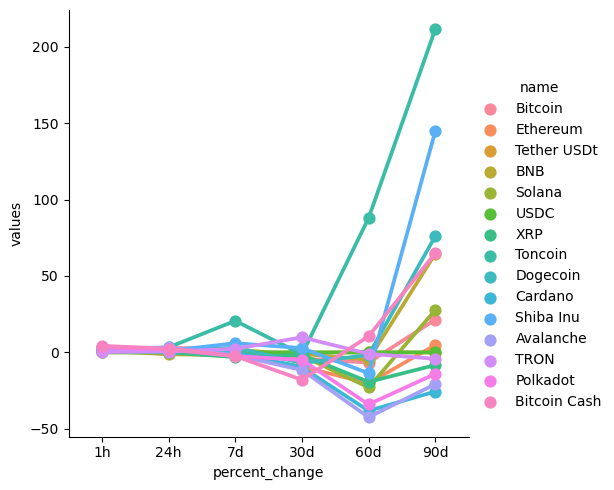

In [56]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [59]:
# now I just want to look at the data for bitcoin
# we are going to create a dataframe with the columns we want
# then we can use query to get the specific data we want

df10 = df[['name','quote.USD.price','last_updated']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,last_updated
0,Bitcoin,62515.50526,2024-05-15T12:09:00.000Z
0,Bitcoin,63772.58174,2024-05-15T13:04:00.000Z
0,Bitcoin,63655.92915,2024-05-15T13:07:00.000Z
0,Bitcoin,63602.53338,2024-05-15T13:09:00.000Z
0,Bitcoin,63602.53338,2024-05-15T13:10:00.000Z
0,Bitcoin,63602.53338,2024-05-15T13:11:00.000Z
0,Bitcoin,63615.77718,2024-05-15T13:12:00.000Z


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='last_updated', ylabel='quote.USD.price'>

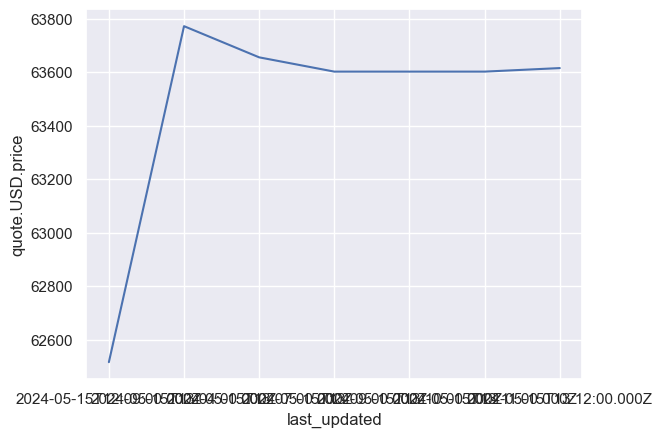

In [61]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='last_updated', y='quote.USD.price', data = df10)